<a href="https://colab.research.google.com/github/siddhant-shekhar/titanic_survivor_using_naive_bayes/blob/main/titanic_survivor_using_naive_bayes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score



import warnings
warnings.filterwarnings('ignore')

In [ ]:
data = pd.read_csv('https://raw.githubusercontent.com/codebasics/py/master/ML/14_naive_bayes/titanic.csv')

In [ ]:
data.head()

,PassengerId,Name,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,1,"Braund, Mr. Owen Harris",3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,"Heikkinen, Miss. Laina",3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,female,35.0,1,0,113803,53.1000,C123,S,1
4,5,"Allen, Mr. William Henry",3,male,35.0,0,0,373450,8.0500,NaN,S,0


In [ ]:
data.isnull().sum()

PassengerId      0
Name             0
Pclass           0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
Survived         0
dtype: int64

In [ ]:
data['Age'] = data.Age.fillna(data.Age.mean())

In [ ]:
data = data.dropna()

In [ ]:
data.isnull().sum()

PassengerId    0
Name           0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
Survived       0
dtype: int64

In [ ]:
# since PassengerId, Name, Ticket, Cabin, SibSp, Parch can't play any role in the prediction, so we will drop them.

data.drop(['PassengerId', 'Name', 'Ticket', 'Cabin', 'SibSp', 'Parch'], axis = 1, inplace = True)

In [ ]:
data.head()

,Pclass,Sex,Age,Fare,Embarked,Survived
1,1,female,38.0,71.2833,C,1
3,1,female,35.0,53.1000,S,1
6,1,male,54.0,51.8625,S,0
10,3,female,4.0,16.7000,S,1
11,1,female,58.0,26.5500,S,1


In [ ]:
# Label Encoding by dummies

le = LabelEncoder()

data = pd.concat([data, pd.get_dummies(data['Sex'])], axis ='columns')
data['Embarked'] = le.fit_transform(data['Embarked'])

In [ ]:
data.head()

,Pclass,Sex,Age,Fare,Embarked,Survived,female,male
1,1,female,38.0,71.2833,0,1,1,0
3,1,female,35.0,53.1000,2,1,1,0
6,1,male,54.0,51.8625,2,0,0,1
10,3,female,4.0,16.7000,2,1,1,0
11,1,female,58.0,26.5500,2,1,1,0


In [ ]:
data.drop(['Sex', 'female'], axis = 1, inplace = True)

In [ ]:
data.head()

,Pclass,Age,Fare,Embarked,Survived,male
1,1,38.0,71.2833,0,1,0
3,1,35.0,53.1000,2,1,0
6,1,54.0,51.8625,2,0,1
10,3,4.0,16.7000,2,1,0
11,1,58.0,26.5500,2,1,0


In [ ]:
# Naive bayes model training


from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB

model = GaussianNB()

X = data.drop('Survived', axis = 1)
y = data['Survived']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30)

In [ ]:
model.fit(X_train, y_train)

GaussianNB()

In [ ]:
model.score(X_test, y_test)

0.7704918032786885

In [ ]:
model.predict_proba(X_test[:10])

array([[7.68880013e-01, 2.31119987e-01],
       [7.55966134e-01, 2.44033866e-01],
       [8.62304798e-03, 9.91376952e-01],
       [4.84567842e-01, 5.15432158e-01],
       [8.62850803e-03, 9.91371492e-01],
       [2.09147407e-05, 9.99979085e-01],
       [5.21358212e-04, 9.99478642e-01],
       [4.96988848e-01, 5.03011152e-01],
       [2.60405395e-03, 9.97395946e-01],
       [4.30076688e-03, 9.95699233e-01]])

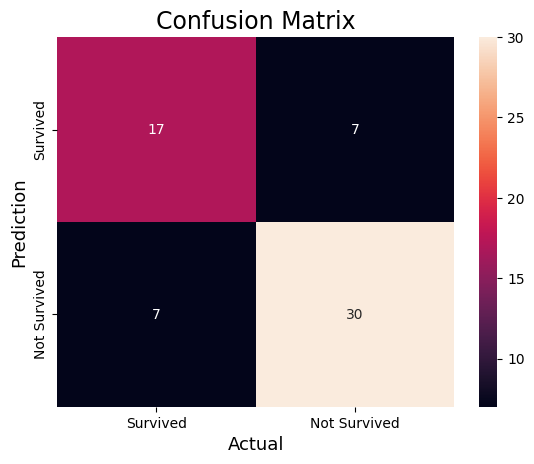

In [ ]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, model.predict(X_test))

sns.heatmap(cm,
            annot=True,
            fmt='g',
            xticklabels=['Survived','Not Survived'],
            yticklabels=['Survived','Not Survived'])
plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('Confusion Matrix',fontsize=17)
plt.show()

In [ ]:
acc = accuracy_score(y_test, model.predict(X_test))
acc

0.7704918032786885